<a href="https://colab.research.google.com/github/Arminsbss/Reinforcement-learning-N-N-grid/blob/main/reinforcement_learning_n_n_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Rewards**



In [ ]:
import pandas as pd

Grid = pd.read_excel('Grid.xlsx',header=None)
Grid = Grid.values
# Grid[End_State_indexes[0]][End_State_indexes[1]]*=100

#**Environment**

In [ ]:
environment_rows = 30
environment_columns = 30

#**States**

In [ ]:
Start_State_indexes=[29,0]
End_State_indexes=[0,29]
Grid[End_State_indexes[0]][End_State_indexes[1]]

25

#**Actions**

In [ ]:
# The function below returns True if the indices are within the range of the array, and False otherwise.
def is_valid_cell(get_cell,row,column):
    num_rows = len(get_cell)
    num_columns = len(get_cell[0]) if num_rows > 0 else 0
    return 0 <= row < num_rows and 0 <= column < num_columns

def Right_Action(get_cell,row,column):
  if is_valid_cell(get_cell,row,column):
    return get_cell[row,column+1]
  else:
    return "NA"

def Up_Action(get_cell,row,column):
  if is_valid_cell(get_cell,row,column):
    return get_cell[row-1,column]
  else:
    return "NA"

In [ ]:
actions= ['up', 'right', 'down', 'left']

In [ ]:
State=Grid[Start_State_indexes[0]][Start_State_indexes[1]]
print(State)

-10


In [ ]:
if is_valid_cell(Grid,Start_State_indexes[0],Start_State_indexes[1]):
  print("T")
else:
  print("F")

T


#**Q-Values**
Q(s, a) = (1 − α) Q(s, a) + α(R(s) + γ (max[Q(s′, a′)]))

In [ ]:
def Q_Value(State,Action,Q_Current,Learning_rate,immediate_reward,discount_factor):
  return (1-Learning_rate)*Q_Current+Learning_rate*(immediate_reward(State)+discount_factor*(max(Q(s+1,a))))

In [ ]:
import numpy as np
q_values= np.zeros((environment_rows, environment_columns, 4))

In [ ]:
#define a function that determines if the specified location is a terminal state


#define a function that will choose a random, non-terminal starting location
def get_starting_location():
  #get a random row and column index
  current_row_index = np.random.randint(environment_rows) #Start_State_indexes[0]
  current_column_index = np.random.randint(environment_columns) #Start_State_indexes[1]
  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
  return current_row_index, current_column_index

#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon,
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return 1

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

#Define a function that will get the shortest path between any location within the warehouse that
#the robot is allowed to travel and the item packaging location.
def get_shortest_path(start_row_index, start_column_index):
#if this is a 'legal' starting location
  current_row_index, current_column_index = start_row_index, start_column_index
  shortest_path = []
  shortest_path.append([current_row_index, current_column_index])
  #continue moving along the path until we reach the goal (i.e., the item packaging location)
  move=0
  while move<100:#current_row_index=! 0 && current_column_index=! 29:
    #get the best action to take
    action_index = get_next_action(current_row_index, current_column_index, epsilon)
    #move to the next location on the path, and add the new location to the list
    current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
    shortest_path.append([current_row_index, current_column_index])
    move+=1
    if shortest_path[-1][0]==0:
      while shortest_path[-1][1]!=29:
        current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, 1)
        shortest_path.append([current_row_index, current_column_index])
      return shortest_path
    if shortest_path[-1][1]==29:
      while shortest_path[-1][0]!=0:
        current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, 0)
        shortest_path.append([current_row_index, current_column_index])
      return shortest_path
  return shortest_path

#**Main**



In [ ]:
LR=int(input("please enter Learning_rate: "))

In [ ]:
#define training parameters
epsilon = 0.7 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.5 #discount factor for future rewards
learning_rate = 0.2 #the rate at which the AI agent should learn

#run through 10000 training episodes
for episode in range(10000):
  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the item packaging area or crash into an item storage location)

  #choose which action to take (i.e., where to move next)
  action_index = get_next_action(row_index, column_index, epsilon)

  #perform the chosen action, and transition to the next state (i.e., move to the next location)
  old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
  row_index, column_index = get_next_location(row_index, column_index, action_index)

  #receive the reward for moving to the new state, and calculate the temporal difference
  reward = Grid[row_index, column_index]
  old_q_value = q_values[old_row_index, old_column_index, action_index]
  temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

  #update the Q-value for the previous state and action pair
  new_q_value = (1-learning_rate)*old_q_value + (learning_rate * temporal_difference)
  q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

Training complete!


In [ ]:
import matplotlib.pyplot as plt
def plot_it(coordinates):
  x_coords, y_coords = zip(*coordinates)

  # Create a new figure
  plt.figure()

  # Plot the path
  plt.plot(x_coords, y_coords, marker='o', linestyle='-')

  # Add labels and title
  plt.xlabel('X-coordinate')
  plt.ylabel('Y-coordinate')
  plt.title('Path Visualization')

  # Show the plot
  plt.show()

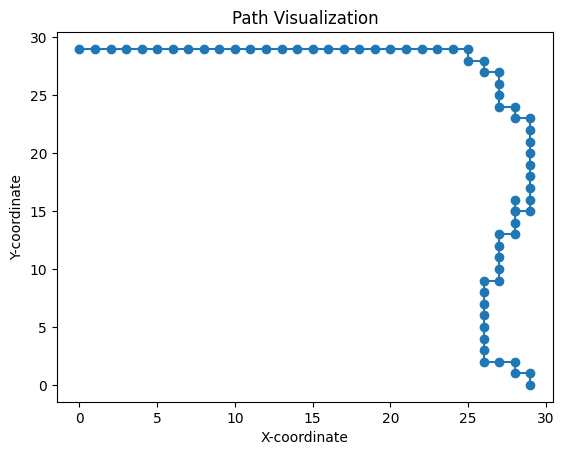

[[29, 0], [29, 1], [28, 1], [28, 2], [27, 2], [26, 2], [26, 3], [26, 4], [26, 5], [26, 6], [26, 7], [26, 8], [26, 9], [27, 9], [27, 10], [27, 11], [27, 12], [27, 13], [28, 13], [28, 14], [28, 15], [28, 16], [28, 15], [29, 15], [29, 16], [29, 17], [29, 18], [29, 19], [29, 20], [29, 21], [29, 22], [29, 23], [28, 23], [28, 24], [27, 24], [27, 25], [27, 26], [27, 27], [26, 27], [26, 28], [25, 28], [25, 29], [24, 29], [23, 29], [22, 29], [21, 29], [20, 29], [19, 29], [18, 29], [17, 29], [16, 29], [15, 29], [14, 29], [13, 29], [12, 29], [11, 29], [10, 29], [9, 29], [8, 29], [7, 29], [6, 29], [5, 29], [4, 29], [3, 29], [2, 29], [1, 29], [0, 29]]


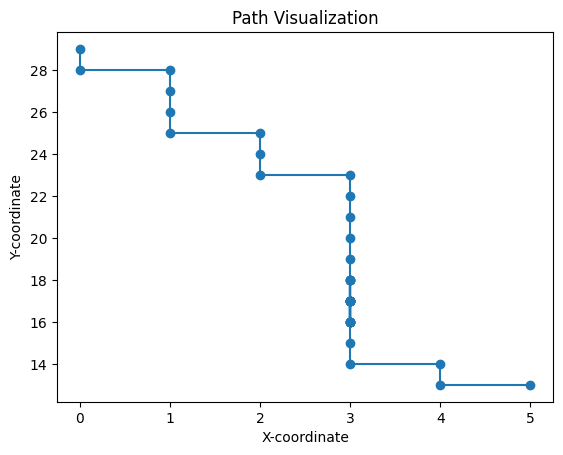

[[5, 13], [4, 13], [4, 14], [3, 14], [3, 15], [3, 16], [3, 17], [3, 16], [3, 17], [3, 18], [3, 17], [3, 16], [3, 17], [3, 16], [3, 17], [3, 18], [3, 17], [3, 18], [3, 17], [3, 16], [3, 17], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [3, 21], [3, 22], [3, 23], [2, 23], [2, 24], [2, 25], [1, 25], [1, 26], [1, 27], [1, 28], [0, 28], [0, 29]]


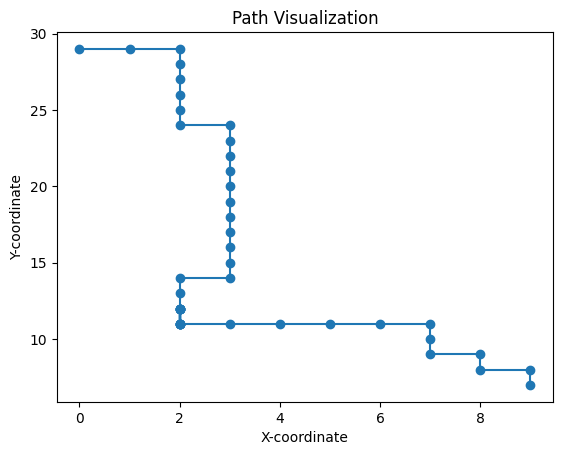

[[9, 7], [9, 8], [8, 8], [8, 9], [7, 9], [7, 10], [7, 11], [6, 11], [5, 11], [4, 11], [3, 11], [2, 11], [2, 12], [2, 11], [2, 12], [2, 11], [2, 12], [2, 11], [2, 12], [2, 11], [2, 12], [2, 11], [2, 12], [2, 13], [2, 14], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [3, 21], [3, 22], [3, 23], [3, 24], [2, 24], [2, 25], [2, 26], [2, 27], [2, 28], [2, 29], [1, 29], [0, 29]]


In [ ]:
#display a few shortest paths
coordinates=get_shortest_path(29, 0)
plot_it(coordinates)
print(coordinates)
coordinates=get_shortest_path(5, 13)
plot_it(coordinates)
print(coordinates)
coordinates=get_shortest_path(9, 7)
plot_it(coordinates)
print(coordinates)

In [ ]:
import pandas as pd

# Create a DataFrame from the 2D array
df = pd.DataFrame(Grid)

# Define a function to highlight the cell containing the number 7
def highlight_seven(cell):
    if cell == 7:
        return 'background-color: yellow'
    else:
        return ''

# Apply the function to the DataFrame
df = df.style.applymap(highlight_seven)

# Display the DataFrame
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-5,-4,6,0,14,-4,-2,6,14,2,12,6,3,-1,-10,-4,-10,8,4,-4,-5,-10,2,-3,10,-2,-8,-1,7,25
1,10,-2,9,7,11,-3,11,14,5,12,-9,4,-9,3,-7,0,4,4,-2,8,-1,-4,2,7,2,13,10,1,-9,-10
2,4,-2,-9,10,-7,4,-6,14,7,3,-1,6,12,-4,-2,-3,-3,-2,-4,-4,-8,0,-7,0,8,-10,14,6,-1,3
3,-3,-7,4,7,10,9,4,6,3,1,0,14,-3,10,3,8,8,4,-8,-5,2,4,10,7,-6,1,5,-8,5,10
4,-7,-4,-7,6,6,-9,13,14,2,-10,2,3,-8,4,14,8,-2,-3,-5,-9,9,-1,9,4,14,-4,12,1,13,2
5,-3,-9,9,2,0,-9,-2,14,5,0,-1,7,-2,-3,3,-6,1,3,-3,-5,4,8,-7,11,-4,0,-9,-9,0,-3
6,-4,9,3,-2,12,7,6,-2,1,1,-5,10,-2,0,1,8,0,-3,13,8,1,-7,-3,-7,-4,10,11,8,0,9
7,14,7,14,10,2,14,5,-3,-9,5,9,4,-10,8,11,4,1,12,-5,-2,9,-7,-10,5,6,1,1,0,-8,3
8,13,-10,0,-7,9,10,-9,12,14,-6,-5,-9,-9,4,0,7,11,-4,-2,9,1,8,4,5,-7,11,7,4,8,3
9,-6,-9,6,6,-2,0,3,-1,10,0,-2,-9,-4,1,8,3,-4,8,-9,7,1,-9,-10,-9,-8,-2,-4,10,-4,1


In [ ]:
from tabulate import tabulate
def print_array_with_highlight(array, highlight_index):
    # Print the array
    for i, row in enumerate(array):
        for j, num in enumerate(row):
            if (i, j) == highlight_index:
                # Highlight the specified element in red
                print('\033[91m{}\033[0m'.format(num), end=' ')
            else:
                print(num, end=' ')
        print()




array = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
highlight_index = (0, 0)
highlight_index = (1, 0)
print_array_with_highlight(Grid, highlight_index)
table = tabulate(Grid)

# Print the formatted table
print(Grid)

-5 -4 6 0 14 -4 -2 6 14 2 12 6 3 -1 -10 -4 -10 8 4 -4 -5 -10 2 -3 10 -2 -8 -1 7 25 
10 -2 9 7 11 -3 11 14 5 12 -9 4 -9 3 -7 0 4 4 -2 8 -1 -4 2 7 2 13 10 1 -9 -10 
4 -2 -9 10 -7 4 -6 14 7 3 -1 6 12 -4 -2 -3 -3 -2 -4 -4 -8 0 -7 0 8 -10 14 6 -1 3 
-3 -7 4 7 10 9 4 6 3 1 0 14 -3 10 3 8 8 4 -8 -5 2 4 10 7 -6 1 5 -8 5 10 
-7 -4 -7 6 6 -9 13 14 2 -10 2 3 -8 4 14 8 -2 -3 -5 -9 9 -1 9 4 14 -4 12 1 13 2 
-3 -9 9 2 0 -9 -2 14 5 0 -1 7 -2 -3 3 -6 1 3 -3 -5 4 8 -7 11 -4 0 -9 -9 0 -3 
-4 9 3 -2 12 7 6 -2 1 1 -5 10 -2 0 1 8 0 -3 13 8 1 -7 -3 -7 -4 10 11 8 0 9 
14 7 14 10 2 14 5 -3 -9 5 9 4 -10 8 11 4 1 12 -5 -2 9 -7 -10 5 6 1 1 0 -8 3 
13 -10 0 -7 9 10 -9 12 14 -6 -5 -9 -9 4 0 7 11 -4 -2 9 1 8 4 5 -7 11 7 4 8 3 
-6 -9 6 6 -2 0 3 -1 10 0 -2 -9 -4 1 8 3 -4 8 -9 7 1 -9 -10 -9 -8 -2 -4 10 -4 1 
13 10 -4 -4 8 -5 9 -9 -3 -8 -8 3 -7 7 -2 -6 5 8 -5 5 11 4 -8 13 12 -7 -3 10 10 -2 
-3 -5 3 8 7 9 10 14 -5 9 -9 2 5 9 -1 5 -5 12 5 14 -1 -4 4 -10 -6 -10 4 8 6 12 
-9 7 -4 13 2 -3 1 5 -7 12 13 3 -6 12 9 -2 -9 14 -3 

In [ ]:
def print_array_with_highlight(array, highlight_index, prev_highlight=None):
    # Print the array
    for i, row in enumerate(array):
        for j, num in enumerate(row):
            if (i, j) == highlight_index:
                # Highlight the specified element in red
                if prev_highlight is not None and prev_highlight != highlight_index:
                    # Reset the color of the previously highlighted element
                    print('\033[0m', end='')
                print('\033[91m{}\033[0m'.format(num), end=' ')
            else:
                print(num, end=' ')
        print()
    return highlight_index
array = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
highlight_index = (0, 0)
prev_highlight = None

prev_highlight = print_array_with_highlight(array, highlight_index, prev_highlight)

highlight_index = (1, 0)
prev_highlight = print_array_with_highlight(array, highlight_index, prev_highlight)


1 2 3 
4 5 6 
7 8 9 
1 2 3 
4 5 6 
7 8 9 
